### Packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import seaborn as sns
import missingno as msno
import scipy.stats as stat
from scipy.stats import chisquare
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import LabelEncoder

### Load Cleaned Data Set

In [2]:
train_data = pd.read_csv("..\\Data\\train_data_cleaned.csv", index_col=0)

In [3]:
train_data.head().T

,0,1,2,3,4
Patient_Age,2.0,4.0,6.0,12.0,11.0
Mother_Gene,Yes,Yes,Yes,Yes,Yes
Father_Gene,No,Yes,No,No,No
Maternal_Gene,Yes,No,No,Yes,NaN
Paternal_Gene,No,No,No,No,Yes
Blood_Cell,4.760603,4.910669,4.893297,4.70528,4.720703
Mother_Age,NaN,NaN,41.0,21.0,32.0
Father_Age,NaN,23.0,22.0,NaN,NaN
Status,Alive,Deceased,Alive,Deceased,Alive
Respiratory_Rate,Normal (30-60),Tachypnea,Normal (30-60),Tachypnea,Tachypnea


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_Age           20397 non-null  float64
 1   Mother_Gene           21805 non-null  object 
 2   Father_Gene           21501 non-null  object 
 3   Maternal_Gene         19047 non-null  object 
 4   Paternal_Gene         21805 non-null  object 
 5   Blood_Cell            21805 non-null  float64
 6   Mother_Age            15862 non-null  float64
 7   Father_Age            15939 non-null  float64
 8   Status                21805 non-null  object 
 9   Respiratory_Rate      19692 non-null  object 
 10  Heart_Rate            19740 non-null  object 
 11  Follow_Up             19673 non-null  object 
 12  Gender                13068 non-null  object 
 13  Birth_Asphyxia        9848 non-null   object 
 14  Autopsy_Birth_Defect  9846 non-null   object 
 15  Birth_Place        

In [5]:
train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient_Age,20397.0,NaN,NaN,NaN,6.972349,4.317753,0.0,3.0,7.0,11.0,14.0
Mother_Gene,21805,2,Yes,12973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Father_Gene,21501,2,No,12962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maternal_Gene,19047,2,Yes,10510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paternal_Gene,21805,2,No,12346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood_Cell,21805.0,NaN,NaN,NaN,4.898778,0.199865,4.092727,4.762793,4.899258,5.033685,5.609829
Mother_Age,15862.0,NaN,NaN,NaN,34.527361,9.851695,18.0,26.0,35.0,43.0,51.0
Father_Age,15939.0,NaN,NaN,NaN,41.972708,13.038504,20.0,31.0,42.0,53.0,64.0
Status,21805,2,Alive,10955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Respiratory_Rate,19692,2,Normal (30-60),9938,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_data.groupby("Genetic_Disorder")["Disorder_Subclass"].value_counts()

Genetic_Disorder                              Disorder_Subclass                  
Mitochondrial genetic inheritance disorders   Leigh syndrome                         4683
                                              Mitochondrial myopathy                 3971
                                              Leber's hereditary optic neuropathy     587
Multifactorial genetic inheritance disorders  Diabetes                               1653
                                              Alzheimer's                             133
                                              Cancer                                   91
Single-gene inheritance diseases              Cystic fibrosis                        3145
                                              Tay-Sachs                              2556
                                              Hemochromatosis                        1228
Name: Disorder_Subclass, dtype: int64

Given that the `Disorder_Subclass` is a subgroup of the `Genetic_Disorder`, I will be focusing my EDA and modeling going forward using the `Disorder Subclass` as my primary feature to predict.

### Additional Defined Functions

In [7]:
# Plots the ecdf against its theoretical normal distribution ecdf
def ecdfplot(data, colname):

    def ecdfplot(data):
        """Compute ECDF for a one-dimensional array of measurements."""
        # Number of data points: n
        n = len(data)

        # x-data for the ECDF: x
        x = np.sort(data)

        # y-data for the ECDF: y
        y = np.arange(1, n+1) / n
        
        return x, y
    
    x, y = ecdf(data)
    
    # Theoretical normal distribution
    mean = np.mean(data)
    std = np.std(data)
    samples = np.random.normal(mean, std, size=10000)
    xtheo, ytheo = ecdf(samples)   
        
    plt.figure(figsize=(8,7))
    sns.set()
    
    plt.plot(x, y, marker=".", linestyle="none")
    plt.plot(xtheo, ytheo)
    plt.xlabel(colname)
    plt.ylabel("Cumulative Distribution Function")
    
    return plt.show()

In [8]:
def cathist(col, bins):
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,8))
    sns.set_style("darkgrid")
    
    sns.histplot(x=col,
             data=train_data,
             hue="Genetic_Disorder",
             ax=ax[0],
             legend=False,
             element="step",
             bins=bins)
    ax[0].set_title("Genetic_Disorder")

    sns.histplot(x=col,
             data=train_data,
             hue="Disorder_Subclass",
             ax=ax[1],
             legend=False,
             element="step",
             bins=bins)
    ax[1].set_title("Disorder_Subclass")
    
# The legend is dropped to focus more on the visual comparison between 
# groups rather than how each specific group compare to one another.

In [9]:
def catbox(col):
    sns.set_style("darkgrid")

    sns.boxplot(x="Disorder_Subclass",
                y=col,
                data=train_data)
    plt.xticks(rotation=90)
    
    plt.show()
    

### Evaluation of the Numerical Data Features

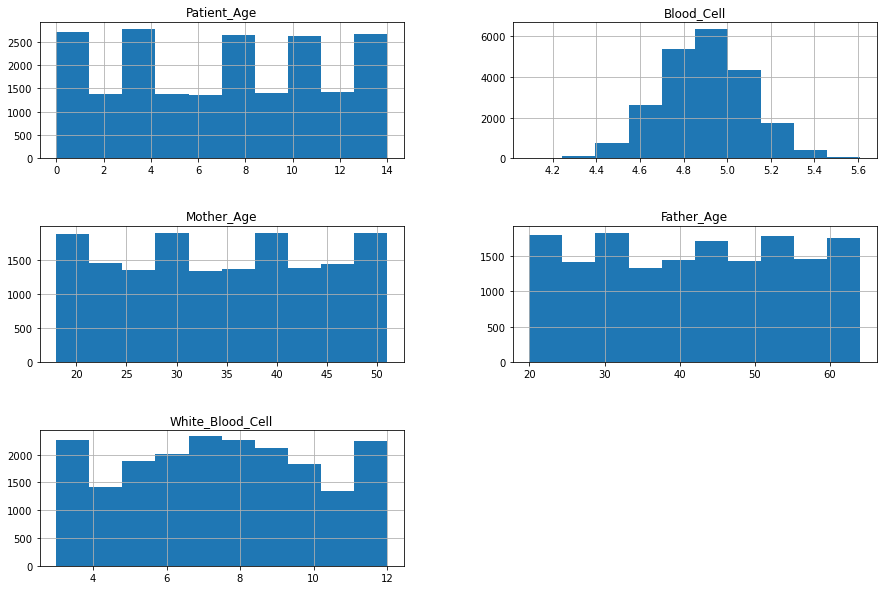

In [10]:
# Subsetting for numerical columns (Pulled from Data Wrangling NB)

# Columns dropped due to being more of a catagorical data type
numData = train_data.select_dtypes('float64').drop(columns=["Previous_Abortions", "Symptom_1", "Symptom_2", "Symptom_3", "Symptom_4", "Symptom_5"])

numData.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.show()

#### Age Groups

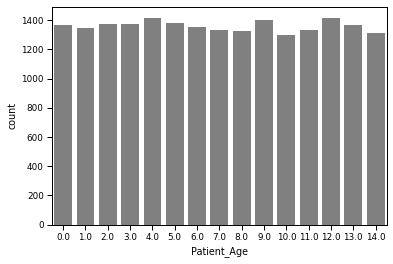

In [11]:
sns.set_context("paper")
sns.countplot(x="Patient_Age",
             data=train_data,
             color="grey")
plt.show()

There appears to be bins in two types of catagories for `Patient_Age`, high at more than 2500 and low at less than 1500 counts. But upon closer inspection, this is just due to the default binning and the data is a lot more uniformly distributed instead.

This also appears to be the similar cases with `Mother_Age` and `Father_Age`.

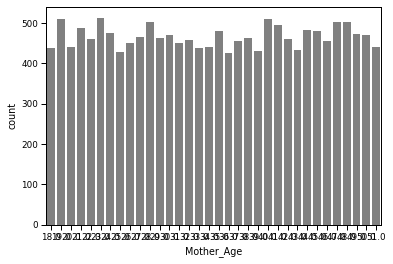

In [12]:
sns.countplot(x="Mother_Age",
             data=train_data,
             color="grey")
plt.show()

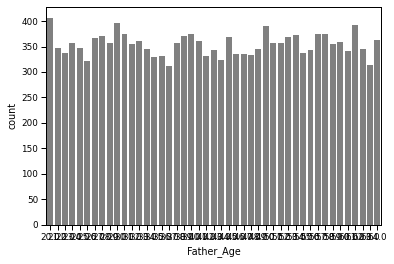

In [13]:
sns.countplot(x="Father_Age",
             data=train_data,
             color="grey")
plt.show()

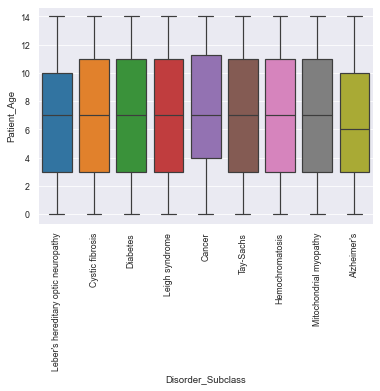

In [14]:
catbox("Patient_Age")

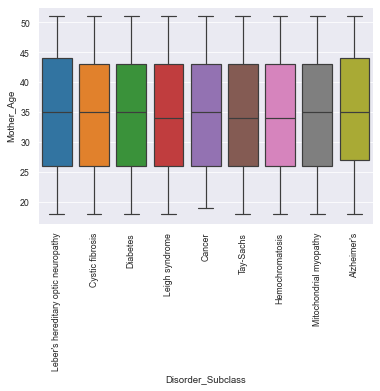

In [15]:
catbox("Mother_Age")

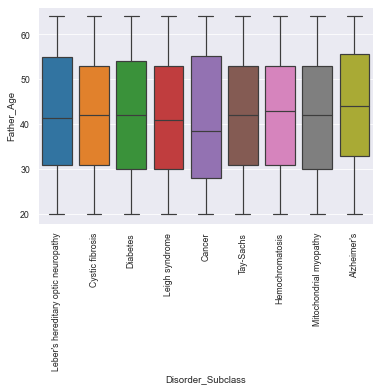

In [16]:
catbox("Father_Age")

In [17]:
train_data.groupby("Disorder_Subclass")["Patient_Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Disorder_Subclass,,,,,,,,
Alzheimer's,148.0,6.554054,4.150705,0.0,3.0,6.0,10.00,14.0
Cancer,92.0,7.413043,4.217056,0.0,4.0,7.0,11.25,14.0
Cystic fibrosis,3227.0,6.950728,4.345265,0.0,3.0,7.0,11.00,14.0
Diabetes,1692.0,6.871749,4.373268,0.0,3.0,7.0,11.00,14.0
Hemochromatosis,1268.0,6.875394,4.270298,0.0,3.0,7.0,11.00,14.0
Leber's hereditary optic neuropathy,608.0,6.784539,4.399112,0.0,3.0,7.0,10.00,14.0
Leigh syndrome,4831.0,6.936245,4.318969,0.0,3.0,7.0,11.00,14.0
Mitochondrial myopathy,4142.0,6.952438,4.286009,0.0,3.0,7.0,11.00,14.0
Tay-Sachs,2664.0,7.095345,4.295584,0.0,3.0,7.0,11.00,14.0


In [18]:
train_data.groupby("Disorder_Subclass")["Mother_Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Disorder_Subclass,,,,,,,,
Alzheimer's,109.0,35.293578,9.810522,18.0,27.0,35.0,44.0,51.0
Cancer,76.0,34.552632,9.464875,19.0,26.0,35.0,43.0,51.0
Cystic fibrosis,2562.0,34.661983,9.781911,18.0,26.0,35.0,43.0,51.0
Diabetes,1358.0,34.684094,9.966542,18.0,26.0,35.0,43.0,51.0
Hemochromatosis,997.0,34.495486,9.694595,18.0,26.0,34.0,43.0,51.0
Leber's hereditary optic neuropathy,472.0,34.978814,9.911047,18.0,26.0,35.0,44.0,51.0
Leigh syndrome,3789.0,34.453418,9.824879,18.0,26.0,34.0,43.0,51.0
Mitochondrial myopathy,3234.0,34.474026,9.896125,18.0,26.0,35.0,43.0,51.0
Tay-Sachs,2122.0,34.469840,9.847651,18.0,26.0,34.0,43.0,51.0


In [19]:
train_data.groupby("Disorder_Subclass")["Father_Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Disorder_Subclass,,,,,,,,
Alzheimer's,110.0,43.572727,12.662492,20.0,33.0,44.0,55.75,64.0
Cancer,70.0,40.971429,14.220797,20.0,28.0,38.5,55.25,64.0
Cystic fibrosis,2563.0,42.045259,12.993735,20.0,31.0,42.0,53.00,64.0
Diabetes,1362.0,42.342878,13.248733,20.0,30.0,42.0,54.00,64.0
Hemochromatosis,1025.0,42.081951,13.112238,20.0,31.0,43.0,53.00,64.0
Leber's hereditary optic neuropathy,490.0,42.159184,13.541845,20.0,31.0,41.5,55.00,64.0
Leigh syndrome,3790.0,41.689446,13.073452,20.0,30.0,41.0,53.00,64.0
Mitochondrial myopathy,3283.0,41.887603,12.994954,20.0,30.0,42.0,53.00,64.0
Tay-Sachs,2103.0,42.070376,12.961988,20.0,31.0,42.0,53.00,64.0


When looking at the distribution using a box plot compared to the target column, there looks to be very little variations between the groups. Although there are a few cases like `Alzheimer's` or `Cancer`, that shows a lower mean compared to the rest of the subclasses, but this is more due to lack of data count compared with the other subclasses.

#### Blood Groups

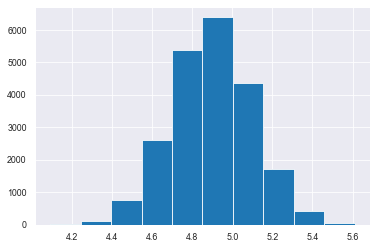

In [20]:
plt.hist(train_data.Blood_Cell)
plt.show()

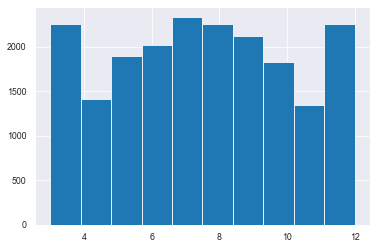

In [21]:
plt.hist(train_data.White_Blood_Cell)
plt.show()

`Blood_Cell` looks normally distributed, while the `White_Blood_Cell` has peaks on either ends.

In [22]:
train_data.groupby("Disorder_Subclass")["Blood_Cell"].describe()

,count,mean,std,min,25%,50%,75%,max
Disorder_Subclass,,,,,,,,
Alzheimer's,152.0,4.899783,0.195558,4.387914,4.745121,4.915510,5.025946,5.485407
Cancer,97.0,4.863199,0.191872,4.248565,4.739756,4.880735,4.964362,5.259710
Cystic fibrosis,3448.0,4.900813,0.197606,4.215599,4.767529,4.901421,5.034599,5.511131
Diabetes,1817.0,4.894888,0.200578,4.290668,4.766167,4.891765,5.031867,5.515462
Hemochromatosis,1355.0,4.892834,0.198909,4.317890,4.753105,4.897317,5.024500,5.519373
Leber's hereditary optic neuropathy,648.0,4.899169,0.192723,4.333409,4.771449,4.899771,5.033983,5.409731
Leigh syndrome,5160.0,4.903683,0.201842,4.146230,4.766603,4.904090,5.040607,5.564212
Mitochondrial myopathy,4405.0,4.895322,0.199943,4.092727,4.758294,4.898373,5.027989,5.592451
Tay-Sachs,2833.0,4.900130,0.199972,4.258799,4.760774,4.896738,5.035786,5.609829


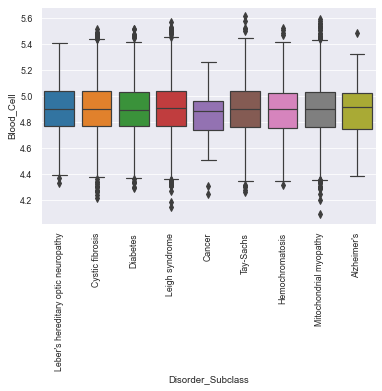

In [23]:
catbox("Blood_Cell")

There are outliers that need to be further investigated with other features to identify it it can be dropped or kept.

In [24]:
train_data.White_Blood_Cell.describe()

count    19687.000000
mean         7.488293
std          2.653759
min          3.000000
25%          5.425565
50%          7.478725
75%          9.529785
max         12.000000
Name: White_Blood_Cell, dtype: float64

Looking at the summary for `White_Blood_Cell` with reference to the histogram distribution, it looks like there is an instrumentation factor that is causing a bias for the upper and lower range. The instrument recording the values may not be able to record values below 3 or values above 12, this means that anything too low will default to 3, while anything too high will default to 12. This makes any values counted at 3 or 12 inaccurate with incorrect weight factors to these ends. I do know that values above 3 or below 12 are accurate given they have decimals to differenate them. Counts at 3 and 12 will need to be changed to `NaN` since they will add bias to the data. But this will also increase the percentage of `NaN` for this column, which will be considered when dealing with all of the missing values.

In [25]:
train_data["White_Blood_Cell"].replace([3, 12], np.NaN, inplace=True)

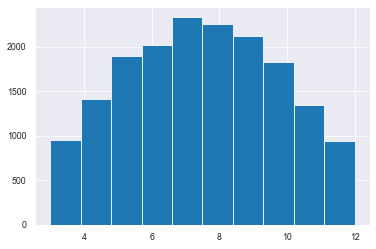

In [26]:
plt.hist(train_data.White_Blood_Cell)
plt.show()

In [27]:
train_data["White_Blood_Cell"].describe()

count    17061.000000
mean         7.485963
std          2.238168
min          3.000736
25%          5.709408
50%          7.478571
75%          9.221865
max         11.999857
Name: White_Blood_Cell, dtype: float64

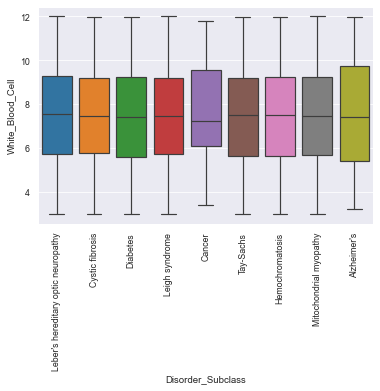

In [28]:
catbox("White_Blood_Cell")

### Evaluation of the Catagorical Data Features

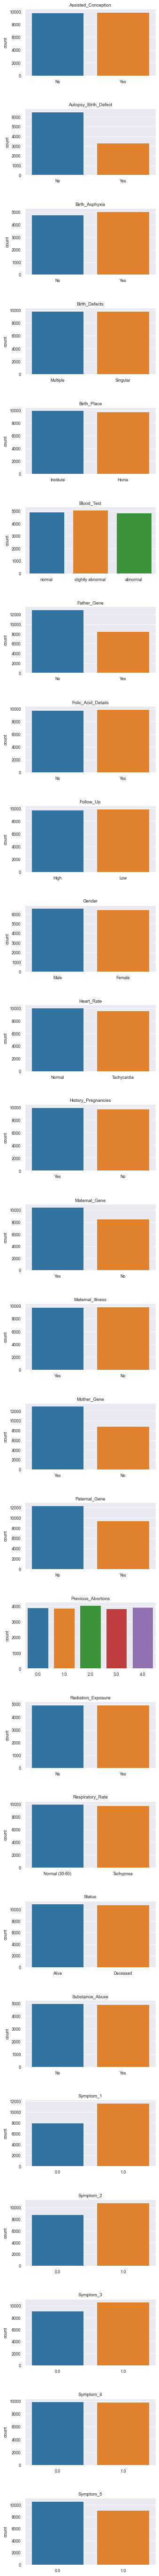

In [29]:
# Subsetting for catagorical columns, it will be everything that wasn't in the numData, to include the features dropped from there.

# Columns dropped due to being more of a catagorical data type
cols = set(train_data.columns) - set(numData.columns)
catData = train_data[cols]

# Categorical Count Data
# Target columns are dropped since they are to be evaluated against (From Data Wrangling NB)
cols = catData.columns.drop(["Genetic_Disorder", "Disorder_Subclass"])
cols = cols.sort_values()

sns.set_style("darkgrid")
fig, ax = plt.subplots(len(cols), figsize = (5,100))

for i, col in enumerate(cols):
    sns.countplot(x=col,
                  data=catData,
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    
plt.subplots_adjust(hspace = 0.5)

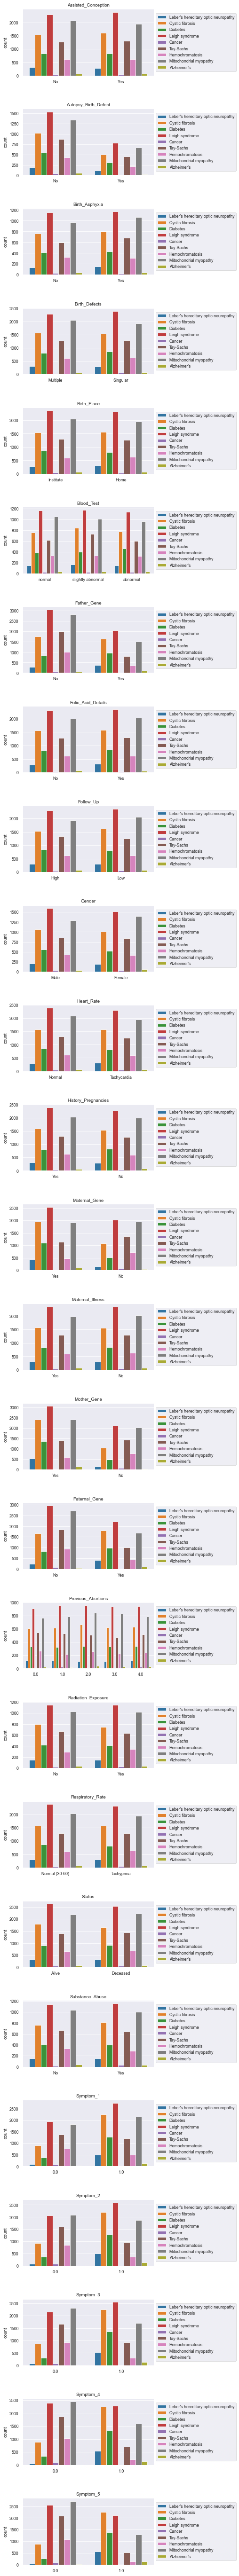

In [30]:
cols = catData.columns.drop(["Genetic_Disorder", "Disorder_Subclass"])
cols = cols.sort_values()
fig, ax = plt.subplots(len(cols), figsize = (5,100))

for i, col in enumerate(cols):
    sns.countplot(x=col,
                  data=catData,
                  hue=catData["Disorder_Subclass"],
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    ax[i].legend([],[], frameon=False)
    ax[i].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
plt.subplots_adjust(hspace = 0.5)

### Hot Encode

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_Age           20397 non-null  float64
 1   Mother_Gene           21805 non-null  object 
 2   Father_Gene           21501 non-null  object 
 3   Maternal_Gene         19047 non-null  object 
 4   Paternal_Gene         21805 non-null  object 
 5   Blood_Cell            21805 non-null  float64
 6   Mother_Age            15862 non-null  float64
 7   Father_Age            15939 non-null  float64
 8   Status                21805 non-null  object 
 9   Respiratory_Rate      19692 non-null  object 
 10  Heart_Rate            19740 non-null  object 
 11  Follow_Up             19673 non-null  object 
 12  Gender                13068 non-null  object 
 13  Birth_Asphyxia        9848 non-null   object 
 14  Autopsy_Birth_Defect  9846 non-null   object 
 15  Birth_Place        

In [90]:
train_data = pd.read_csv("..\\Data\\train_data_cleaned.csv", index_col=0)

In [63]:
# Columns to encode
to_Encode = list(train_data.select_dtypes('object').columns)
to_Encode

['Mother_Gene',
 'Father_Gene',
 'Maternal_Gene',
 'Paternal_Gene',
 'Status',
 'Respiratory_Rate',
 'Heart_Rate',
 'Follow_Up',
 'Gender',
 'Birth_Asphyxia',
 'Autopsy_Birth_Defect',
 'Birth_Place',
 'Folic_Acid_Details',
 'Maternal_Illness',
 'Radiation_Exposure',
 'Substance_Abuse',
 'Assisted_Conception',
 'History_Pregnancies',
 'Birth_Defects',
 'Blood_Test',
 'Genetic_Disorder',
 'Disorder_Subclass']

In [91]:
# Keep NaN
encode_train_data = train_data
original = train_data
mask = train_data.isnull()

# Hot Encode
for col in to_Encode:
    encode_train_data[col] = LabelEncoder().fit_transform(encode_train_data[col].astype(str))

encode_train_data = encode_train_data.where(mask, original, axis=1)

In [94]:
mask = train_data.isnull()
mask

,Patient_Age,Mother_Gene,Father_Gene,Maternal_Gene,Paternal_Gene,Blood_Cell,Mother_Age,Father_Age,Status,Respiratory_Rate,...,Birth_Defects,White_Blood_Cell,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22079,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22080,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
22081,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
encode_train_data.head()

,Patient_Age,Mother_Gene,Father_Gene,Maternal_Gene,Paternal_Gene,Blood_Cell,Mother_Age,Father_Age,Status,Respiratory_Rate,...,Birth_Defects,White_Blood_Cell,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,2.0,1,0,1,0,4.760603,NaN,NaN,0,0,...,2,9.857562,1,1.0,1.0,1.0,1.0,1.0,0,5
1,4.0,1,1,0,0,4.910669,NaN,23.0,1,1,...,0,5.522560,2,1.0,NaN,1.0,1.0,0.0,3,2
2,6.0,1,0,0,0,4.893297,41.0,22.0,0,0,...,1,NaN,2,0.0,1.0,1.0,1.0,1.0,1,3
3,12.0,1,0,1,0,4.705280,21.0,NaN,1,1,...,1,7.919321,1,0.0,0.0,1.0,0.0,0.0,0,6
4,11.0,1,0,2,1,4.720703,32.0,NaN,0,1,...,0,4.098210,1,0.0,0.0,0.0,0.0,NaN,1,1


In [93]:
train_data.head()

,Patient_Age,Mother_Gene,Father_Gene,Maternal_Gene,Paternal_Gene,Blood_Cell,Mother_Age,Father_Age,Status,Respiratory_Rate,...,Birth_Defects,White_Blood_Cell,Blood_Test,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,2.0,1,0,1,0,4.760603,NaN,NaN,0,0,...,2,9.857562,1,1.0,1.0,1.0,1.0,1.0,0,5
1,4.0,1,1,0,0,4.910669,NaN,23.0,1,1,...,0,5.522560,2,1.0,NaN,1.0,1.0,0.0,3,2
2,6.0,1,0,0,0,4.893297,41.0,22.0,0,0,...,1,NaN,2,0.0,1.0,1.0,1.0,1.0,1,3
3,12.0,1,0,1,0,4.705280,21.0,NaN,1,1,...,1,7.919321,1,0.0,0.0,1.0,0.0,0.0,0,6
4,11.0,1,0,2,1,4.720703,32.0,NaN,0,1,...,0,4.098210,1,0.0,0.0,0.0,0.0,NaN,1,1


In [37]:
encode_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_Age           20397 non-null  float64
 1   Mother_Gene           21805 non-null  int32  
 2   Father_Gene           21805 non-null  int32  
 3   Maternal_Gene         21805 non-null  int32  
 4   Paternal_Gene         21805 non-null  int32  
 5   Blood_Cell            21805 non-null  float64
 6   Mother_Age            15862 non-null  float64
 7   Father_Age            15939 non-null  float64
 8   Status                21805 non-null  int32  
 9   Respiratory_Rate      21805 non-null  int32  
 10  Heart_Rate            21805 non-null  int32  
 11  Follow_Up             21805 non-null  int32  
 12  Gender                21805 non-null  int32  
 13  Birth_Asphyxia        21805 non-null  int32  
 14  Autopsy_Birth_Defect  21805 non-null  int32  
 15  Birth_Place        

In [38]:
encode_train_data = encode_train_data.astype("float64")

In [39]:
encode_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_Age           20397 non-null  float64
 1   Mother_Gene           21805 non-null  float64
 2   Father_Gene           21805 non-null  float64
 3   Maternal_Gene         21805 non-null  float64
 4   Paternal_Gene         21805 non-null  float64
 5   Blood_Cell            21805 non-null  float64
 6   Mother_Age            15862 non-null  float64
 7   Father_Age            15939 non-null  float64
 8   Status                21805 non-null  float64
 9   Respiratory_Rate      21805 non-null  float64
 10  Heart_Rate            21805 non-null  float64
 11  Follow_Up             21805 non-null  float64
 12  Gender                21805 non-null  float64
 13  Birth_Asphyxia        21805 non-null  float64
 14  Autopsy_Birth_Defect  21805 non-null  float64
 15  Birth_Place        

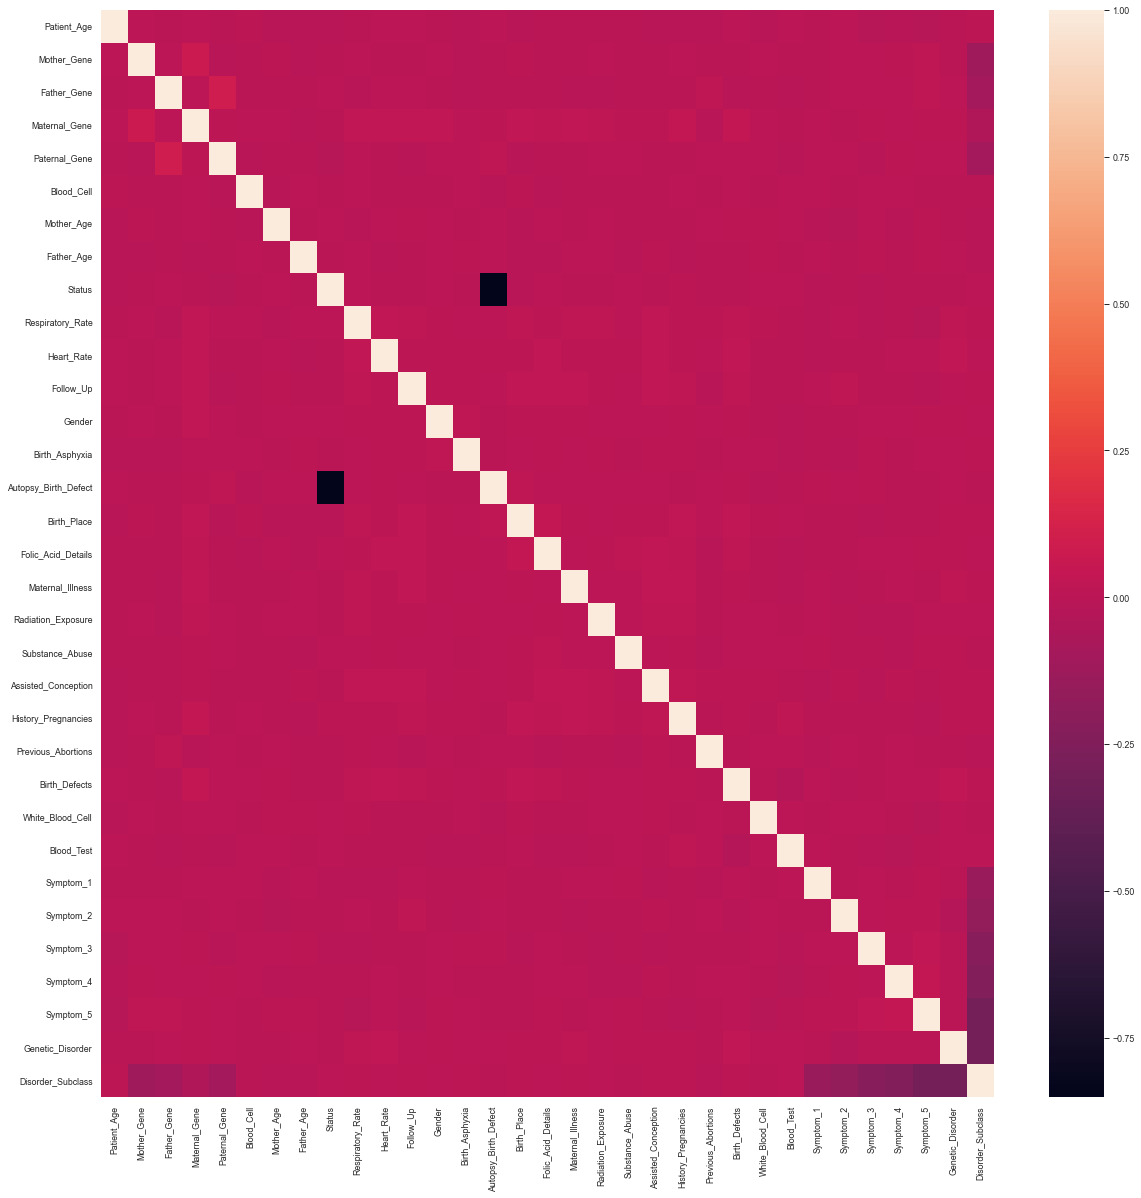

In [40]:
plt.figure(figsize=(20,20))

sns.heatmap(encode_train_data.corr())
plt.show()

#### Looking at Autopsy_Birth_Defect and Status Relationship

In [41]:
train_data.groupby("Status")["Autopsy_Birth_Defect"].value_counts()

Status  Autopsy_Birth_Defect
0       2                       10955
1       0                        6515
        1                        3331
        2                        1004
Name: Autopsy_Birth_Defect, dtype: int64

Doing a quick value count summary, I can see that there are no `alive` status counts for `Autopsy_Birth_Defect`. This make sense, since to have a value for `Autopsy_Birth_Defect`, you need to be deceased to have it performed, thus the perfect corrleation between the two.

#### Mother and Father Correlation

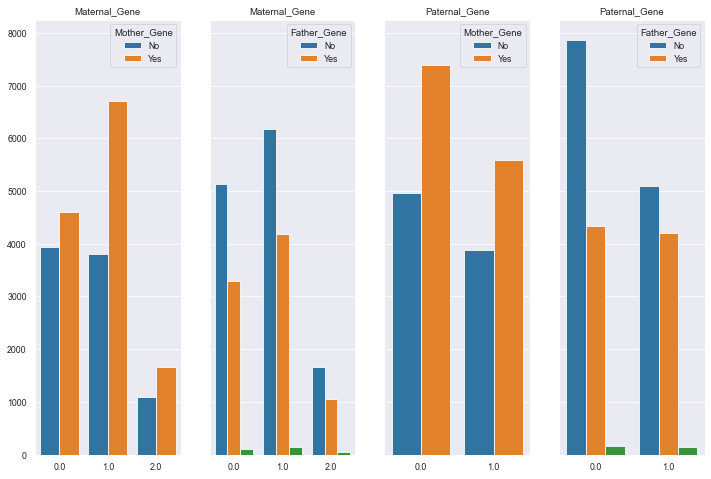

In [42]:
# Mother and Father Genetic Defects
cols = ["Maternal_Gene", "Maternal_Gene", "Paternal_Gene", "Paternal_Gene"]
hue = ["Mother_Gene", "Father_Gene", "Mother_Gene", "Father_Gene"]

sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 4, figsize=(12,8), sharey=True)

for i, col in enumerate(cols):
    sns.countplot(x=col,
                  hue=hue[i],
                  data=encode_train_data,
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].legend(title=hue[i], loc='upper right', labels=['No', 'Yes'])

A quick recap on the feature information. `Maternal_Gene` is the genetic defect from the mother. `Father_Gene` is the genetic defect from the father. `Maternal_Gene` is the genetic defect from the mother's family side. `Paternal_Gene` is the genetic defect from the father's family side.

There looks to be a visible correlation that follows-up on heatmap that compared `Maternal_Gene`, `Paternal_Gene`, `Mother_Gene`, and `Father_Gene`. From a biology standpoint, this make sense in that receiving defect genes from the mother is doubled given that a mother can give either of their X chromosomes, which both may contain the defect, while the Father is only able to give either the X or the Y, which will each contain their own defects individually.

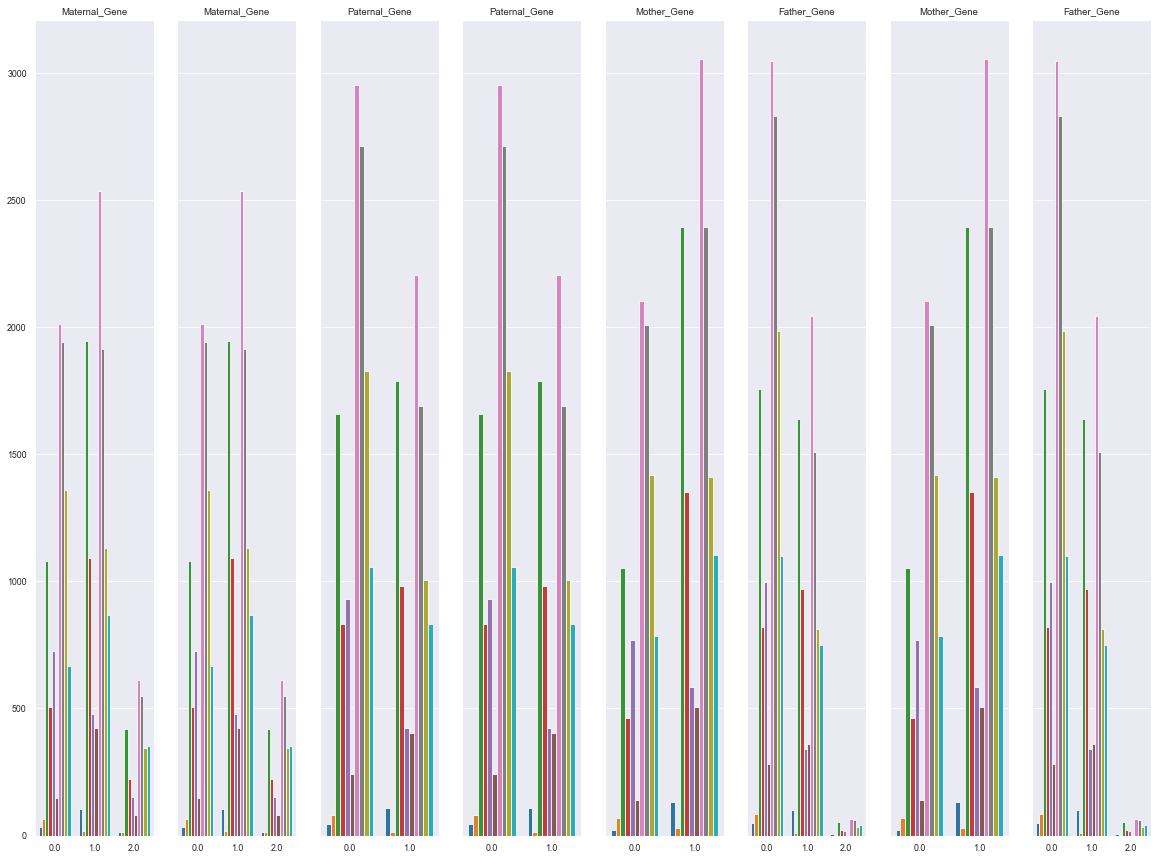

In [43]:
# Mother and Father Genetic Defects with Disorder_Subclass
cols = ["Maternal_Gene", "Maternal_Gene", "Paternal_Gene", "Paternal_Gene", "Mother_Gene", "Father_Gene", "Mother_Gene", "Father_Gene"]

sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 8, figsize=(20,15), sharey=True)

for i, col in enumerate(cols):
    sns.countplot(x=col,
                  hue="Disorder_Subclass",
                  data=encode_train_data,
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].legend([],[], frameon=False)

The 0.0 are the `No` values, while the 1.0 are the `Yes` values. I did not include a legend, since it would be too much information, but also because I am just more interested in comparing how each color varies from each of the column feature.

#### Symptoms Correlation

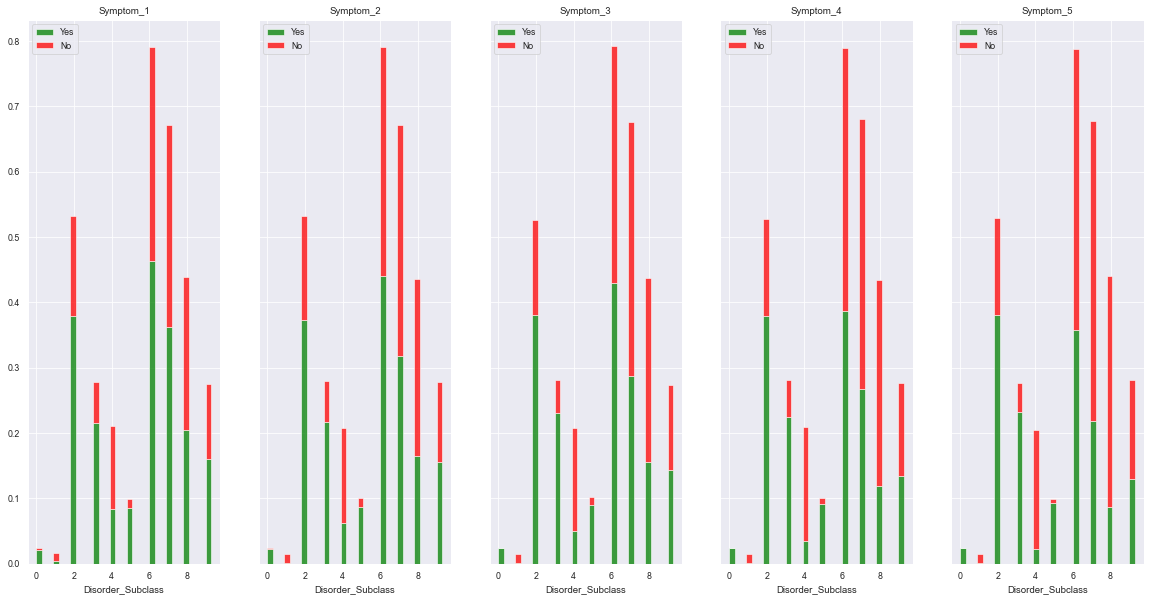

In [44]:
# Categorical Count Data
cols = ["Symptom_1", "Symptom_2", "Symptom_3", "Symptom_4", "Symptom_5"]

sns.set_style("darkgrid")
sns.set_palette("RdBu")
fig, ax = plt.subplots(1, 5, figsize=(20,10), sharey=True)

for i, col in enumerate(cols):
    sns.histplot(binwidth=0.3,
                 x="Disorder_Subclass",
                 hue=col,
                 data=encode_train_data,
                 ax=ax[i],
                 stat="density",
                 multiple="stack",
                 palette=["Red", "Green"])
    ax[i].set_title(col)
    ax[i].set_ylabel(None)
    ax[i].legend(loc='upper left', labels=['Yes', 'No'])


Although the heatmap correlation shows negative correlation values between Disorder Subclass and the 5 different symptoms, this may be due to how the subclass disorders were encoded. There may also be impact due to the small sample sizes for some of the subclass disorders like `Cancer` and `Alzheimer's`. But the varaitions in the graphs given a type of symptom shows there may be some positive correlation that can be evaluated.

#### Blood_Cell Outliers

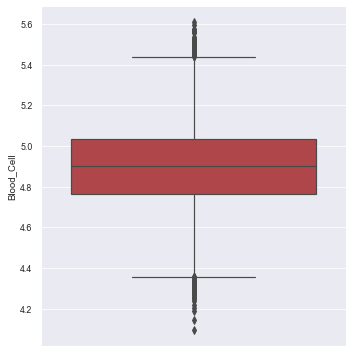

In [45]:
sns.catplot(y="Blood_Cell",
            data=train_data,
            kind="box")

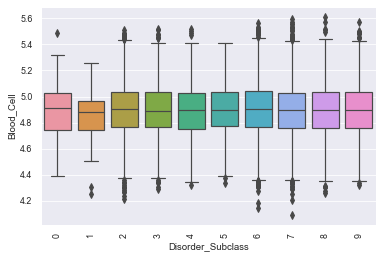

In [46]:
catbox("Blood_Cell")

In [47]:
Q1 = train_data['Blood_Cell'].quantile(0.25)
Q3 = train_data['Blood_Cell'].quantile(0.75)

IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

extract_outliers = train_data.loc[(train_data["Blood_Cell"] >= upper_bound) | (train_data["Blood_Cell"] <= lower_bound)] 

In [48]:
outlier_df = pd.DataFrame(extract_outliers["Disorder_Subclass"].value_counts())
outlier_df.rename({"Disorder_Subclass" : "Outlier_Count"}, axis=1, inplace=True)

temp_df = pd.DataFrame(train_data["Disorder_Subclass"].value_counts())
temp_df = temp_df.join(outlier_df)

temp_df["ratio"] = (temp_df["Outlier_Count"] / temp_df["Disorder_Subclass"]) * 100

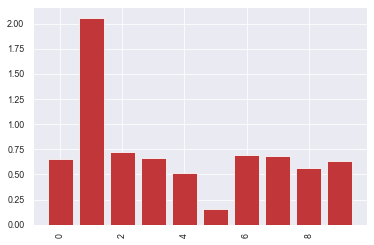

In [49]:
plt.bar(temp_df.index, temp_df["ratio"])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
temp_df

,Disorder_Subclass,Outlier_Count,ratio
6,5160,36,0.697674
7,4405,30,0.681044
2,3448,25,0.725058
8,2833,16,0.564772
9,1890,12,0.634921
3,1817,12,0.660429
4,1355,7,0.516605
5,648,1,0.154321
0,152,1,0.657895
1,97,2,2.061856


Removing the outliers from the `Blood_Cell` feature looks to heavily impact `Cancer`, but this is mostly due to having the smallest sample size compared to the other target `Subclass_Disorders`.

### Handling Missing Data

In [51]:
# Calculate the missing data again
missing_data = pd.concat([train_data.isnull().sum(), 100 * train_data.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

,count,%
Mother_Age,5943,27.255217
Father_Age,5866,26.902087
Symptom_2,2176,9.979363
Symptom_1,2119,9.717955
White_Blood_Cell,2118,9.713368
Previous_Abortions,2117,9.708782
Symptom_5,2116,9.704196
Symptom_4,2068,9.484063
Symptom_3,2053,9.415272
Patient_Age,1408,6.457235


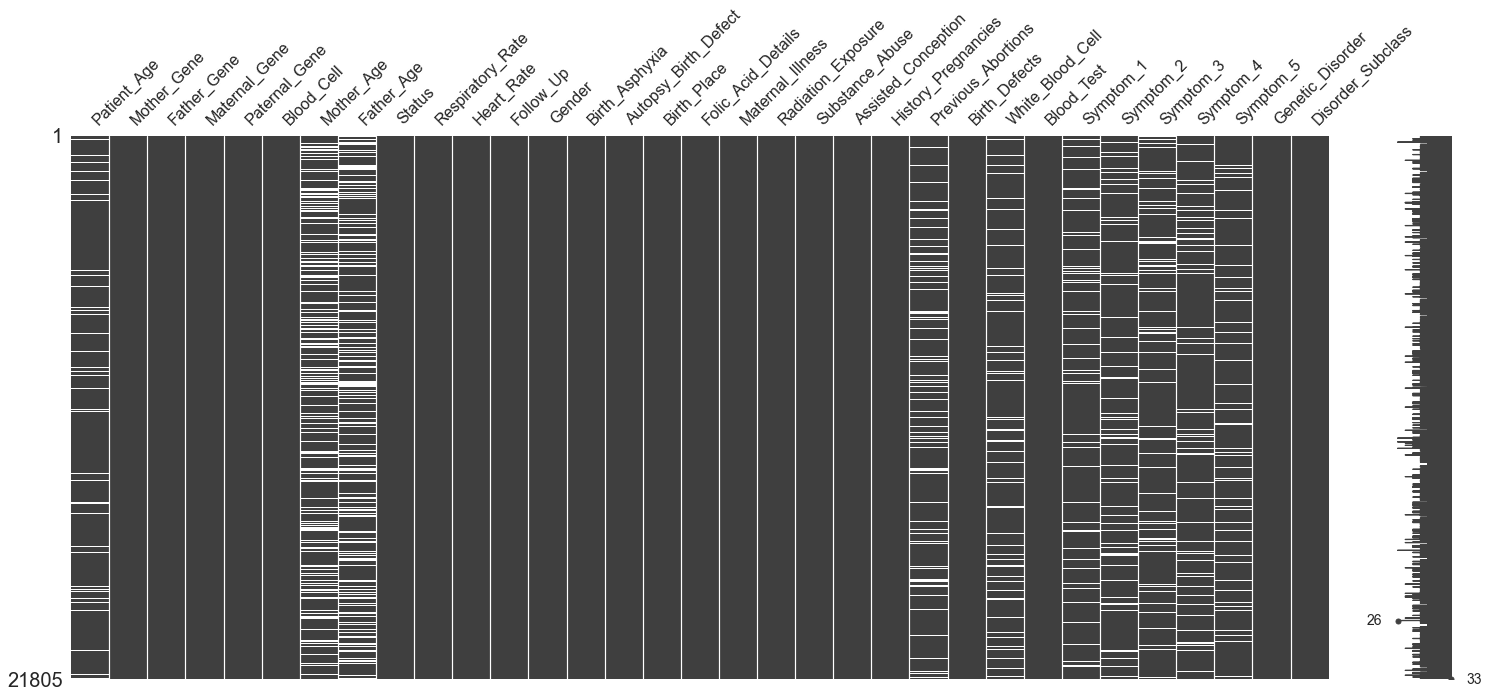

In [52]:
msno.matrix(train_data)
plt.show()

In [53]:
# Save post EDA further cleaned data
train_data.to_csv('../Data/train_data_EDA_cleaned.csv')